# Assignment: Advertisement Image Insertion in Video with Occlusion Handling
## Objective: The goal of this assignment is to develop a computer vision solution that inserts a specified advertisement image into a given video, ensuring graceful handling of occlusions during the insertion process.


In [1]:
import pandas as pd
import numpy as np
from IPython.display import HTML
from base64 import b64encode
import warnings
warnings.filterwarnings('ignore')

C:\Users\SRUSHTI\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import cv2

# Path to the video file
video_path = "input video.mp4"
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    print("Error: Could not open video file.")
    exit()

# Loop through the frames of the video
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Display the frame
    cv2.imshow('Video', frame)

    # Check for the 'q' key to exit the loop
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

#### Loading and displaying the sample video 

In [3]:
# Load the input video file
import cv2

# Path to the video file
video_path = 'sample video.mp4'
cap = cv2.VideoCapture(video_path)

# Check if the video file was successfully opened
if not cap.isOpened():
    print("Error: Could not open video file.")
    exit()

# Loop through the frames of the video
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Display the frame
    cv2.imshow('Video', frame)

    # Check for the 'q' key to exit the loop
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


### Converting white background to transparency

In [4]:
import cv2
import numpy as np

# Loading JPG image
image_path = r"Advertisement Image.jpg"
jpeg_image = cv2.imread(image_path)

# Checking whether the image is loaded successfully
if jpeg_image is None:
    print("Error: Unable to load the image.")
    exit()

# Converting white background to transparency
gray_image = cv2.cvtColor(jpeg_image, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(gray_image, 240, 255, cv2.THRESH_BINARY_INV)

png_image = cv2.cvtColor(jpeg_image, cv2.COLOR_BGR2BGRA)
png_image[:, :, 3] = mask

# Saving as PNG image
cv2.imwrite(r"Advertisement_Image_with_transparency.png", png_image)


True

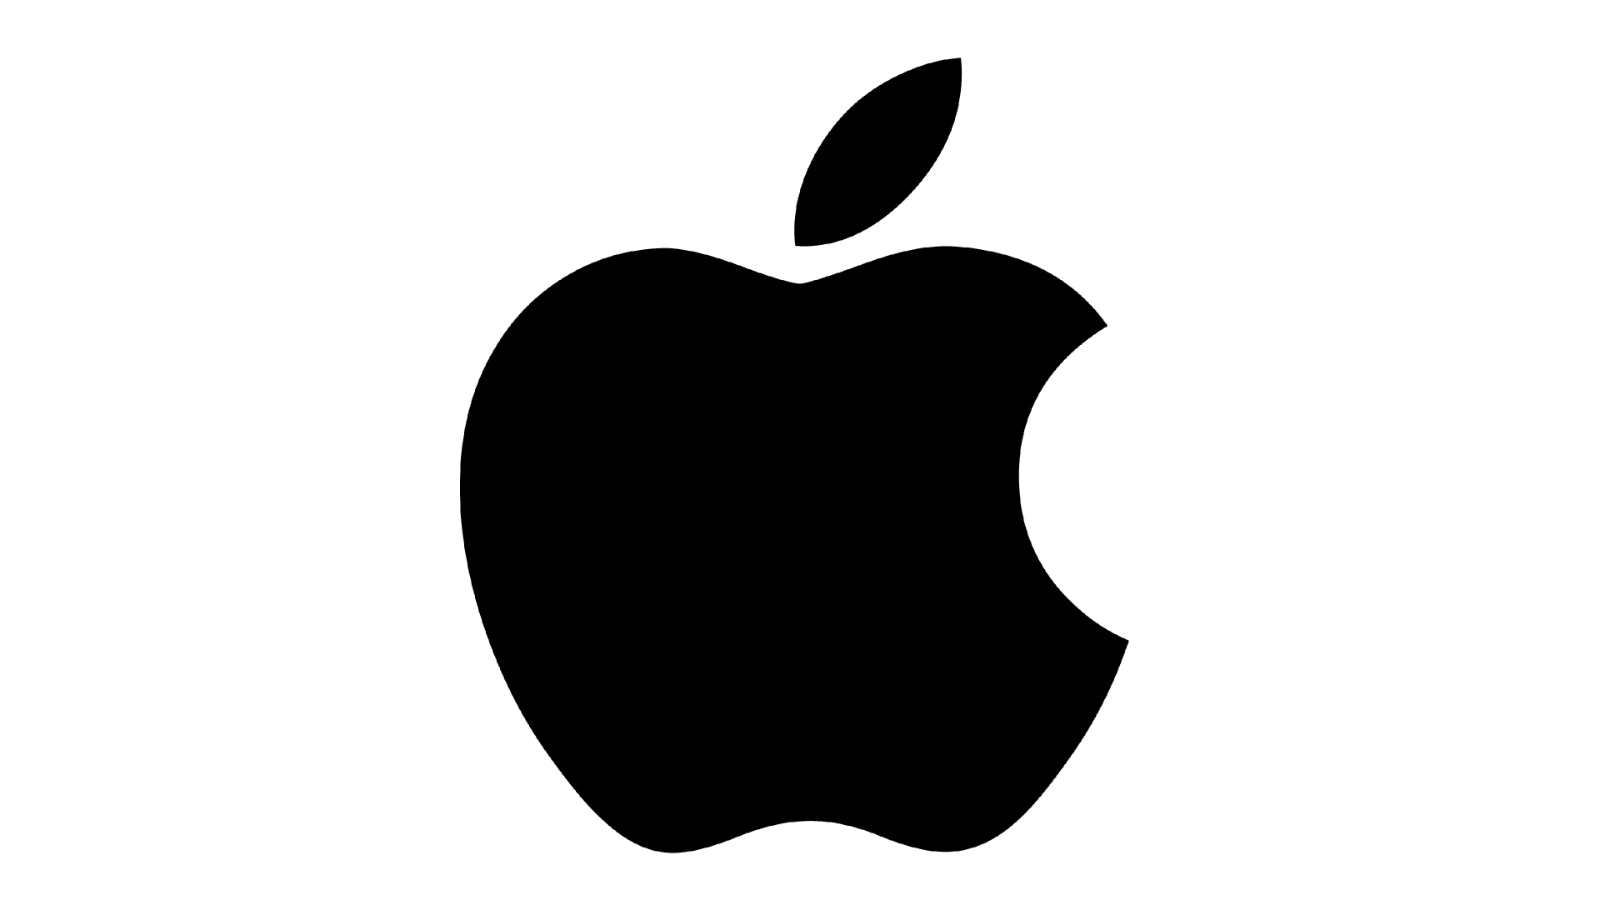

In [5]:
from IPython.display import display, Image

png_image_path = r"Advertisement_Image_with_transparency.png"

# Displaying the PNG image 
display(Image(filename=png_image_path))


## Ad Image Insertion in Video with Occlusion Handling and Saving the output video to local file

In [3]:
import cv2
import numpy as np

# Step 2: Loading Video and Transparent Advertisement Image
video_path = r"input video.mp4"
transparent_advertisement_path = r"Advertisement_Image_with_transparency.png"
sample_video_path = r"Sample Video.mp4"

cap = cv2.VideoCapture(video_path)
transparent_advertisement = cv2.imread(transparent_advertisement_path, cv2.IMREAD_UNCHANGED)

# Checking whether the advertisement image is loaded successfully
if transparent_advertisement is None:
    print("Error: Unable to load the advertisement image.")
    exit()

# Step 3: Extracting Information from Sample Video
sample_cap = cv2.VideoCapture(sample_video_path)
_, sample_frame = sample_cap.read()
occlusion_roi = cv2.selectROI("Select Occlusion Region", sample_frame, fromCenter=False)
cv2.destroyWindow("Select Occlusion Region")
print("Occlusion ROI:", occlusion_roi)

# Step 4: Occlusion Handling Strategy
def handle_occlusion(frame, occlusion_roi, advertisement_img):
    # Extract the region of interest for occlusion handling
    roi = frame[int(occlusion_roi[1]):int(occlusion_roi[1] + 900),
               int(occlusion_roi[0]):int(occlusion_roi[0] + 1600)]

    # Resize the transparent advertisement image to match the dimensions of the region of interest
    resized_advertisement = cv2.resize(advertisement_img, (1600, 900), interpolation=cv2.INTER_NEAREST)

    # Resize the alpha channel to match the dimensions of the region of interest
    alpha_channel = cv2.resize(advertisement_img[:, :, 3], (1600, 900), interpolation=cv2.INTER_NEAREST) / 255.0

    # Blend the images using alpha blending
    blended_roi = (1.0 - alpha_channel[:, :, np.newaxis]) * roi.astype(float) + alpha_channel[:, :, np.newaxis] * resized_advertisement[:, :, :3].astype(float)

    # Convert the result back to uint8
    blended_roi = blended_roi.astype(np.uint8)

    # Replace the region with the blended image
    frame[int(occlusion_roi[1]):int(occlusion_roi[1] + 900),
          int(occlusion_roi[0]):int(occlusion_roi[0] + 1600)] = blended_roi

    return frame

# Step 5: Advertisement Insertion
output_video_path = r"output_video.mp4"  # Provide a proper output file path
fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Change the codec to XVID
out = cv2.VideoWriter(output_video_path, fourcc, 25, (int(cap.get(3)), int(cap.get(4))))

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Step 6: Handle Occlusion and Insert Transparent Advertisement
    frame = handle_occlusion(frame, occlusion_roi, transparent_advertisement)

    # Display the result
    cv2.imshow("Result", frame)
    out.write(frame)

    if cv2.waitKey(20) & 0xFF == ord('q'):
        break

# Step 7: Release Resources
cap.release()
out.release()
cv2.destroyAllWindows()


Occlusion ROI: (74, 83, 300, 357)


### Displaying the Advertisement Frames After Occlusion Handling


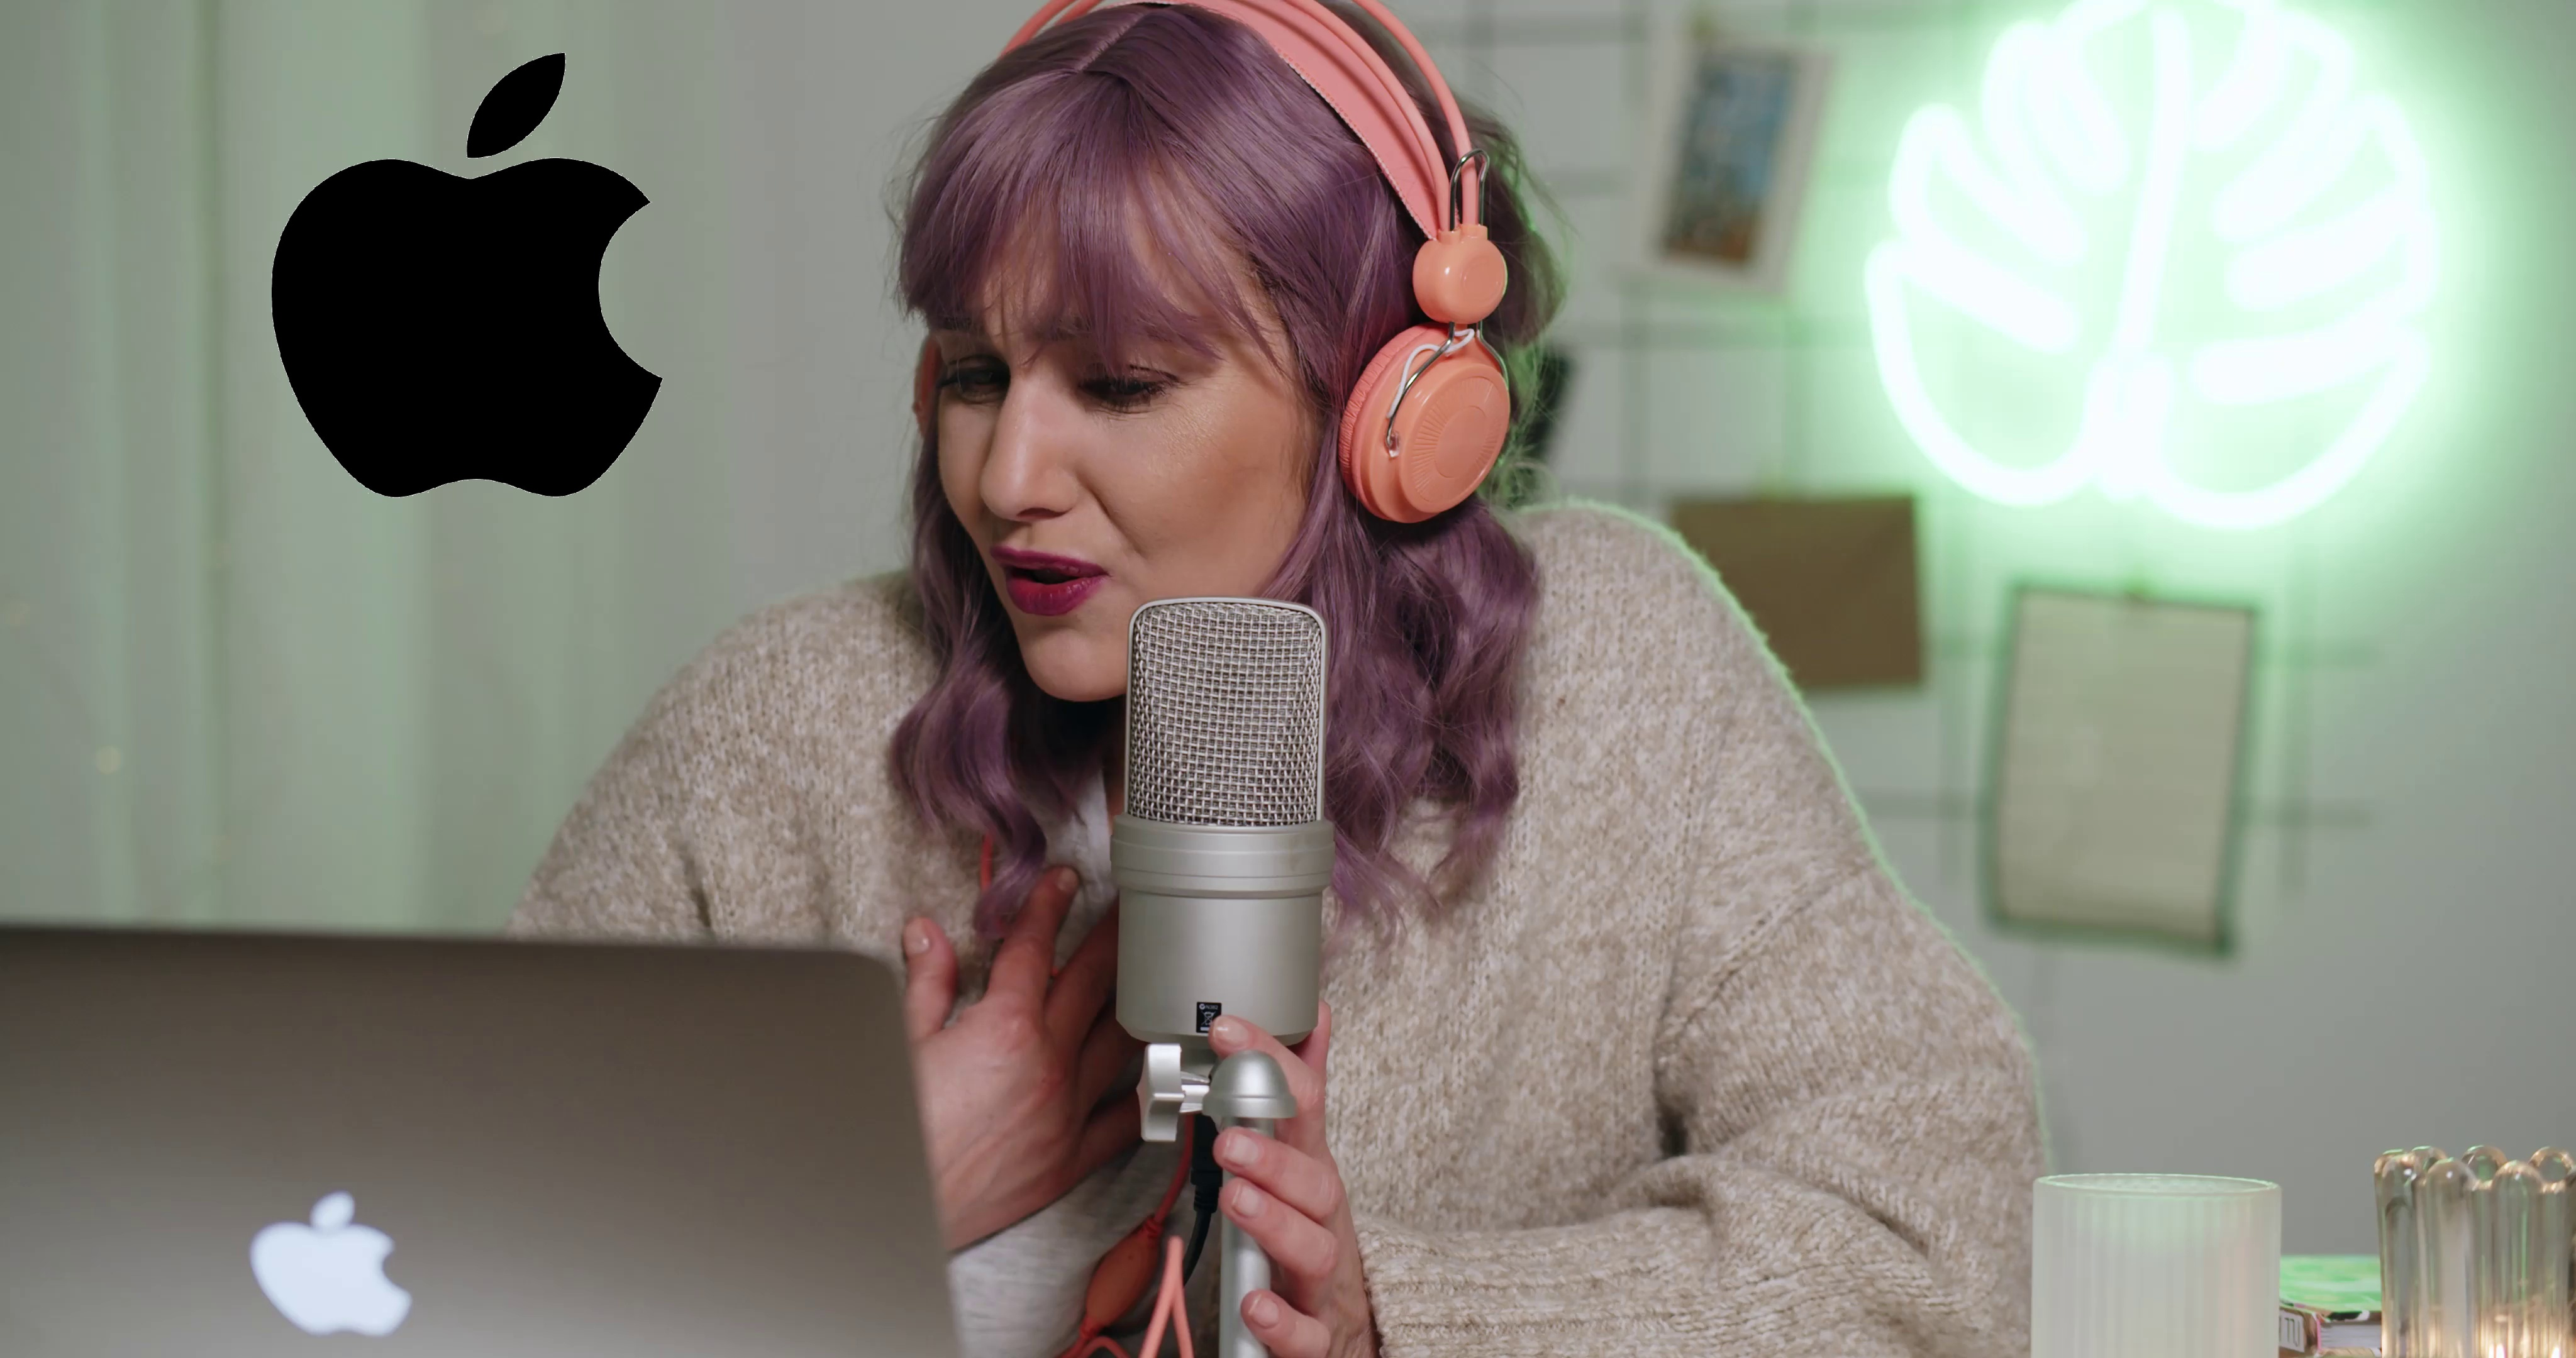

In [8]:
import cv2
import numpy as np
from IPython.display import display, clear_output, HTML
from base64 import b64encode

def handle_occlusion(frame, occlusion_roi, advertisement_img):
    # Extract the region of interest for occlusion handling
    roi = frame[int(occlusion_roi[1]):int(occlusion_roi[1] + occlusion_roi[3]),
               int(occlusion_roi[0]):int(occlusion_roi[0] + occlusion_roi[2])]

    # Resize the transparent advertisement image to match the dimensions of the region of interest
    resized_advertisement = cv2.resize(advertisement_img, (int(occlusion_roi[2]), int(occlusion_roi[3])), interpolation=cv2.INTER_NEAREST)

    # Resize the alpha channel to match the dimensions of the region of interest
    alpha_channel = cv2.resize(advertisement_img[:, :, 3], (int(occlusion_roi[2]), int(occlusion_roi[3])), interpolation=cv2.INTER_NEAREST) / 255.0

    # Blend the images using alpha blending
    blended_roi = (1.0 - alpha_channel[:, :, np.newaxis]) * roi.astype(float) + alpha_channel[:, :, np.newaxis] * resized_advertisement[:, :, :3].astype(float)

    # Convert the result back to uint8
    blended_roi = blended_roi.astype(np.uint8)

    # Replace the region with the blended image
    frame[int(occlusion_roi[1]):int(occlusion_roi[1] + occlusion_roi[3]),
          int(occlusion_roi[0]):int(occlusion_roi[0] + occlusion_roi[2])] = blended_roi

    return frame

def display_video(frames, width, height):
    _, frame = cv2.imencode('.jpeg', frames[0])
    encoded_video = b64encode(frame).decode('utf-8')
    video_tag = f'<img src="data:image/jpeg;base64,{encoded_video}" alt="video" width={width} height={height}>'
    display(HTML(video_tag))
    clear_output(wait=True)

# Loading Video and Transparent Advertisement Image
video_path = r"input video.mp4"
transparent_advertisement_path = r"Advertisement_Image_with_transparency.png"
sample_video_path = r"Sample Video.mp4"

cap = cv2.VideoCapture(video_path)
transparent_advertisement = cv2.imread(transparent_advertisement_path, cv2.IMREAD_UNCHANGED)

# Checking whether the advertisement image is loaded successfully
if transparent_advertisement is None:
    print("Error: Unable to load the advertisement image.")
    exit()

# Extracting Information from Sample Video
sample_cap = cv2.VideoCapture(sample_video_path)
_, sample_frame = sample_cap.read()
occlusion_roi = cv2.selectROI("Select Occlusion Region", sample_frame, fromCenter=False)
cv2.destroyWindow("Select Occlusion Region")

# Advertisement Insertion
output_frames = []

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Handle Occlusion and Insert Transparent Advertisement
    frame = handle_occlusion(frame, occlusion_roi, transparent_advertisement)
    output_frames.append(frame)

# Release Resources
cap.release()

# Displaying the processed frames in the notebook
display_video(output_frames, width=640, height=480)


### Displaying 70 different frames at the time of occlusion handling


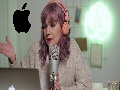
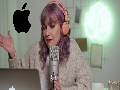
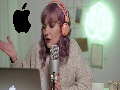
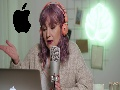
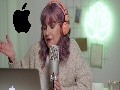
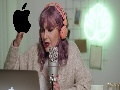
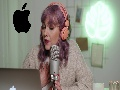
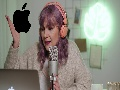
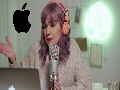
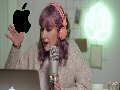
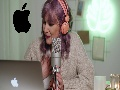
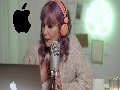
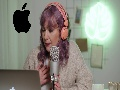
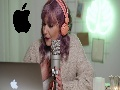
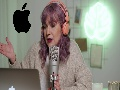
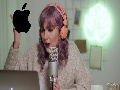
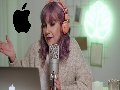
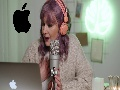
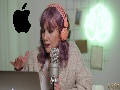
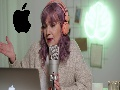
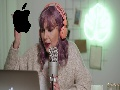
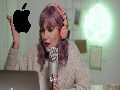
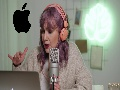
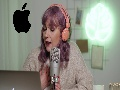
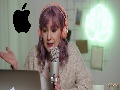
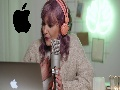
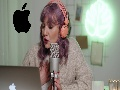
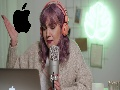
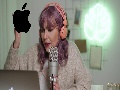
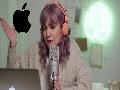
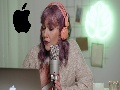
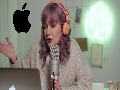
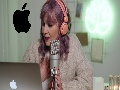
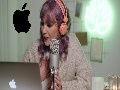
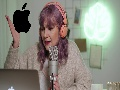
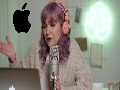
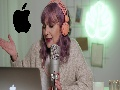
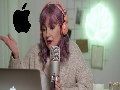
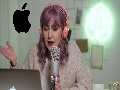
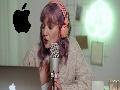
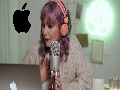
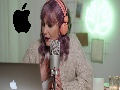
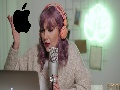
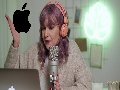
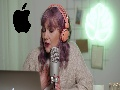
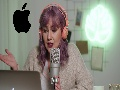
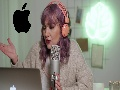
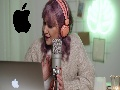
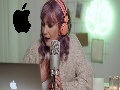
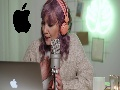
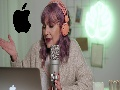
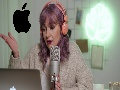
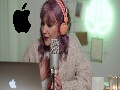
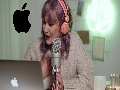
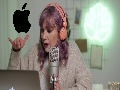
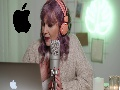
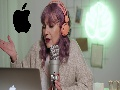
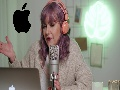
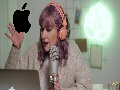
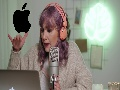
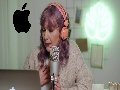
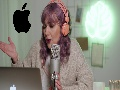
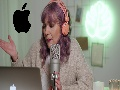
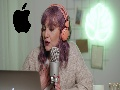
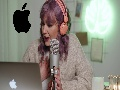
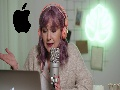
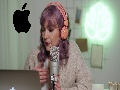
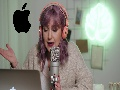
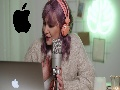
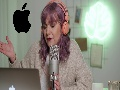

In [23]:
import cv2
import numpy as np
from IPython.display import display, HTML
from base64 import b64encode
import random

def display_images(frames, num_frames=70, images_per_row=5, image_size=(120, 90)):
    unique_frames = random.sample(frames, min(num_frames, len(frames)))

    html_content = '<div style="display: flex; flex-wrap: wrap;">'

    for idx, frame in enumerate(unique_frames):
        _, encoded_frame = cv2.imencode('.jpeg', cv2.resize(frame, image_size))
        encoded_image = b64encode(encoded_frame).decode('utf-8')
        image_tag = f'<img src="data:image/jpeg;base64,{encoded_image}" alt="frame {idx + 1}" style="margin: 5px;">'
        html_content += image_tag

    html_content += '</div>'
    display(HTML(html_content))

# Displaying 70 different frames as individual images with smaller size and adjusted layout
display_images(output_frames, num_frames=70, images_per_row=5, image_size=(120, 90))
